**Simran Saini   20110200**

**Q1.** How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans. M1 = matrix(n,k),  M2 = matrix(k,m)

M1 = [ A11, A12, ... A1k ................. ..............Ank] and

M2 = [B11, B12, ...B1m .................. ...............Bkm]

M3 = M1*M2

m times, **each row** of M1 will multiply with **one column** of M2 (1st column to mth column).

=> There will be k multiplications for each row.

For every element that formed in M3, there is k-1 additions.

```
# There will be a total of n.m.k multiplications.
# There will be a total of n*m*(k-1) additions.

```

**Q2** Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Ans. Numpy is written in C code, its means it can use lower level hardware optimizations to improve execution speed. Where list by lists application is a solely python code, so normaally is performs poorer than Numpy solution.

In [2]:
# Question 2

import time
import numpy as np

def list_matrix_multiply(A, B):  # list of lists method
    # if len(A[0]) != len(B):
    #     raise ValueError("Not in compatible dimensions")
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

n, k, m = 200, 300, 150
A = [[i % 10 for _ in range(k)] for i in range(n)]
B = [[i % 7 for _ in range(m)] for i in range(k)]

start = time.time()
res_LoL = list_matrix_multiply(A, B)
end = time.time()
print("LoL-based time:", end - start, "seconds")

start = time.time()
res_Numpy = np.dot(np.array(A), np.array(B))
end = time.time()
print("Numpy-based time:", end - start, "seconds")






LoL-based time: 0.7123074531555176 seconds
Numpy-based time: 0.010897636413574219 seconds


Numpy is significantly faster than List-of-lists method as it is implemented in optimized C code under the hood of Python library. It uses vectorized operations, reducing Python-level loops. It leverage SIMD instructions and Linear Algebra packages like BLAS/LAPACK backends. Python has significant per-operation: dynamic typing, bounds checking, reference counting, etc.

**Ques 3.** Time-complexity to find median of array through brute force method = O(n + n-1 + n -2 ...... n//2) = O(n^2)
A faster approach can be Quickselect algo. Quickselect is basically "Quicksort, but you only recurse into the side that contains the element you want," so it runs in linear time on average.
1. Pick a pivot: Randomly choose an element from the array (call it p).
2. Partition: Reorder the array so that:
- all elements < p go to the left.
- all elements > p go to the right.
- equal to pivots sit in the middle.
3. Decide which side
Let k be the index (0-based) of the element you're searching for (e.g. n//2 for the median)
- If k falls in the "less-than" zone, recurse on the left subarray.
- If k falls in the "greater-than" zone, recurse on the right, but adjust k to skip over the left + pivot(s).
- If k lands in the pivot zone, you found it.
4.  As soon as your pivot zone covers k, return that pivot value.

It's fast on average because each partition is O(n). You only recurse into one side, cutting your "active" portion roughly in half each time on average. Total work ~ n + n/2 + n/4 +.. = O(n)



In [10]:
import time
import random
import numpy as np

# (works for odd-length lists)
def naive_median(a):
    arr = a.copy()
    n = len(arr)
    k = n // 2
    for _ in range(k):
        # find and remove the maximum element
        max_val = arr[0]
        for v in arr:
            if v > max_val:
                max_val = v
        arr.remove(max_val)
    # median is now the maximum of the remaining elements
    median = arr[0]
    for v in arr:
        if v > median:
            median = v
    return median

# Quickselect
def quickselect(a, k):
    if len(a) == 1:
        return a[0]
    pivot = random.choice(a)
    lows = [el for el in a if el < pivot]
    highs = [el for el in a if el > pivot]
    pivots = [el for el in a if el == pivot]
    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivot
    else:
        return quickselect(highs, k - len(lows) - len(pivots))

def quick_median(a):
    n = len(a)
    if n % 2 == 1:
        return quickselect(a, n // 2)
    else:
        return 0.5 * (quickselect(a, n//2 - 1) + quickselect(a, n//2))

# Generate test data (odd length to simplify naive approach)
n = 1001
data = [random.random() for _ in range(n)]

#  naive
start = time.time()
med_naive = naive_median(data)
time_naive = time.time() - start

#  quickselect
start = time.time()
med_quick = quick_median(data)
time_quick = time.time() - start

#  numpy.median
start = time.time()
med_np = np.median(np.array(data))
time_np = time.time() - start

# Display results
results = {
    "Method": ["Naive", "Quickselect", "NumPy"],
    "Median": [med_naive, med_quick, med_np],
    "Time (s)": [time_naive, time_quick, time_np]
}

import pandas as pd
df = pd.DataFrame(results)
print(df)


        Method    Median  Time (s)
0        Naive  0.496125  0.006665
1  Quickselect  0.496125  0.000342
2        NumPy  0.496125  0.000395


**Findings:**
- all methonds find the same correct median.
- Naive approach to 20x the time than others, thus inefficient.
- Quickselect and NumPy were both fast (near O(n))
- Quickselect slightly outperformed NumPy here, probably due to Python's in-memory efficiency with small lists and good pivot luck.
- NumPy is still excellent and benefits from vectorized C-level optimization.

Q4. What is the gradient of the following function with respect to x and y?

$x^{2}y+ y^{3}sin(x)$

w.r.t x, gradient is **$2xy+ y^{3}cos(x)$**

w.r.t. y, gradient is **$x^{2}+3y^{2}sin(x)$**


In [4]:
import jax.numpy as jnp # Question 5
from jax import grad
import sympy as sp
import numpy as np

# function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# analytical grads
def grad_x_a(x, y):
    return 2*x*y + y**3 * jnp.cos(x)

def grad_y_a(x, y):
    return x**2 + 3*y**2 * jnp.sin(x)

# jax grads
grad_x_j = grad(f, argnums=0)
grad_y_j = grad(f, argnums=1)

# random checks
rng = np.random.default_rng(42)
for _ in range(5):
    xv, yv = rng.normal(), rng.normal()
    gxj, gyj = grad_x_j(xv, yv), grad_y_j(xv, yv)
    gxa, gya = grad_x_a(xv, yv), grad_y_a(xv, yv)
    print(f"x={xv:.3f}, y={yv:.3f}")
    print(f"grad_x jax={gxj:.6f}, analytic={gxa:.6f}, diff={abs(gxj-gxa):.2e}")
    print(f"grad_y jax={gyj:.6f}, analytic={gya:.6f}, diff={abs(gyj-gya):.2e}\n")

# sympy check, Question 6
x, y = sp.symbols('x y')
f_sym = x**2 * y + y**3 * sp.sin(x)
print("sympy grad_x:", sp.diff(f_sym, x))
print("sympy grad_y:", sp.diff(f_sym, y))


x=0.305, y=-1.040
grad_x jax=-1.706796, analytic=-1.706796, diff=1.19e-07
grad_y jax=1.066338, analytic=1.066338, diff=0.00e+00

x=0.750, y=0.941
grad_x jax=2.020265, analytic=2.020265, diff=0.00e+00
grad_y jax=2.373112, analytic=2.373113, diff=2.38e-07

x=-1.951, y=-1.302
grad_x jax=5.900703, analytic=5.900704, diff=4.77e-07
grad_y jax=-0.917141, analytic=-0.917141, diff=0.00e+00

x=0.128, y=-0.316
grad_x jax=-0.112226, analytic=-0.112226, diff=0.00e+00
grad_y jax=0.054594, analytic=0.054594, diff=3.73e-09

x=-0.017, y=-0.853
grad_x jax=-0.591995, analytic=-0.591995, diff=0.00e+00
grad_y jax=-0.036394, analytic=-0.036394, diff=3.73e-09

sympy grad_x: 2*x*y + y**3*cos(x)
sympy grad_y: x**2 + 3*y**2*sin(x)


**Q7.** Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [21]:
# # 1. 2022
#       1. Branch 1
#           1. Roll Number: 1, Name: N,             ## four hiearchies
#               1. Marks: Maths: 100, English: 70 …
#       2. Branch 2

database = {2024: {"Branch 1": {
    1: {"Name": "Simran", "Marks": {"P":44, "C":37, "M":48}}
}, "Branch 2": {}},

2025: {"Branch 1":{},
       "Branch 2": {}
       },

2026: {"Branch 1":{},
       "Branch 2": {}
       }}

print(database)

{2024: {'Branch 1': {1: {'Name': 'Simran', 'Marks': {'P': 44, 'C': 37, 'M': 48}}}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}, 2026: {'Branch 1': {}, 'Branch 2': {}}}


**Q8** Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [18]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

class Database:
    def __init__(self, years):
        self.years = years

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

class Branch:
    def __init__(self, branch_name, students):
        self.branch_name = branch_name
        self.students = students


# create student objects
Simran = Student("Simran", 1, [44, 37, 48])
Lavanya = Student("Lavanya", 2, [80, 32, 8])

# example of building structure
cse_branch = Branch("CSE", [Simran, Lavanya])
year_2025 = Year(2025, [cse_branch])
db = Database([year_2025])

print(db.years[0].branches[0].students[0].name)   # Simran
print(db.years[0].branches[0].students[1].marks)  # [80, 32, 8]


Simran
[80, 32, 8]


**Q9.** Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. y = x
2. $y = x^{2}$
3. $y = \frac{x^{3}}{100}$
4. $y = sin(x)$
5. $y = \frac{sin(x)}{x}$

6. $ y = \frac{log(x)}{x}$
7. $y = e^{x}$

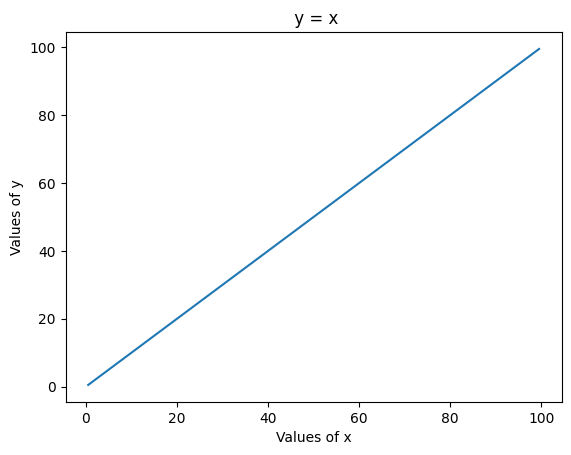

1.


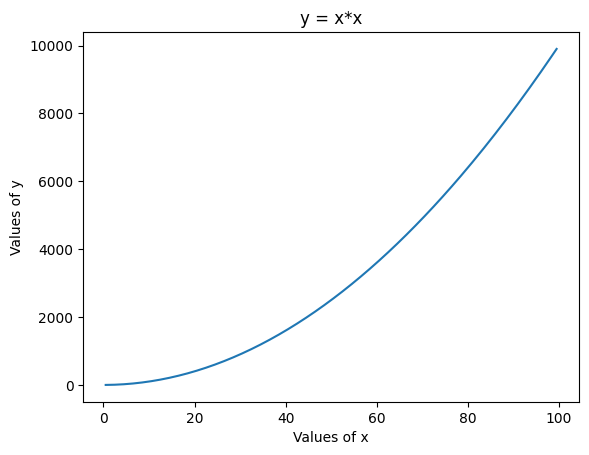

2.


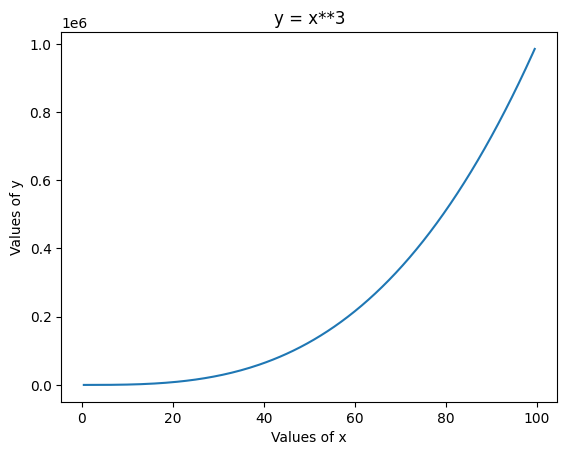

3.


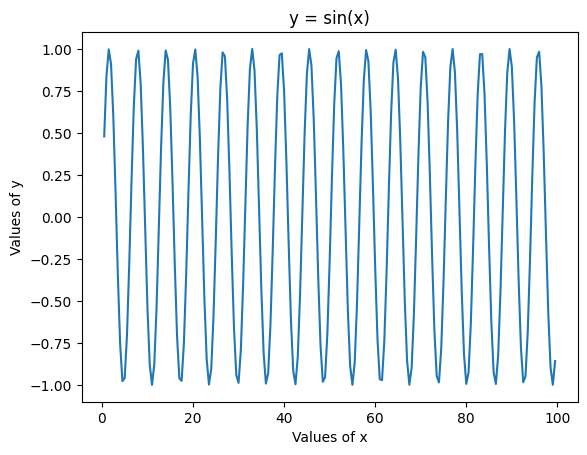

4.


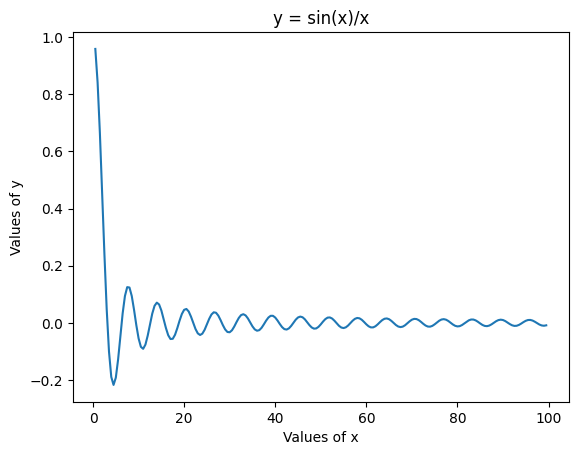

5.


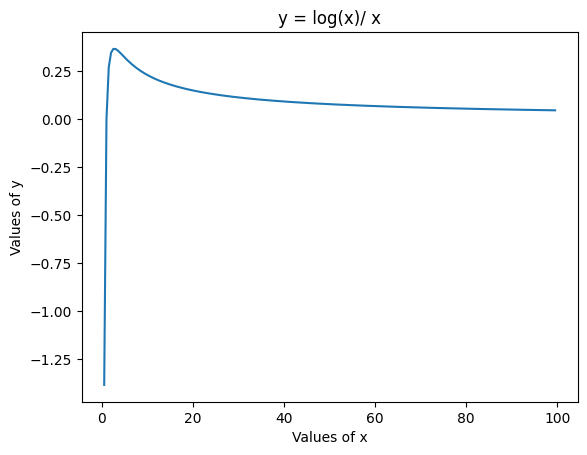

6.


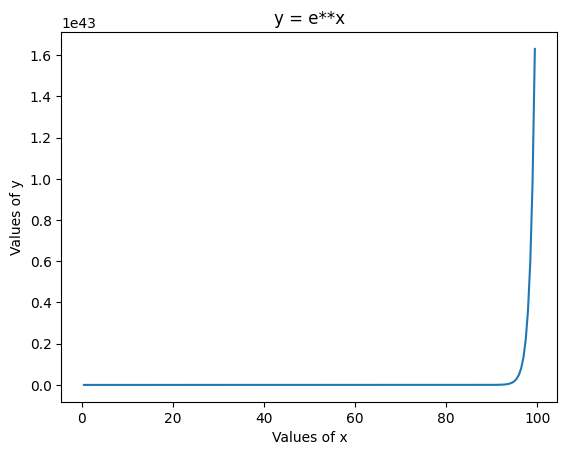

7.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5, 100.0, 0.5)
y = x
plt.plot(x, y)
plt.title(" y = x")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()
print("1.",end= "\n")

y = x*x
plt.plot(x, y)
plt.title("y = x*x")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()
print("2.",end= "\n")

y = x**3
plt.plot(x, y)
plt.title("y = x**3")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()
print("3.",end= "\n")

y = np.sin(x)
plt.plot(x, y)
plt.title("y = sin(x)")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()
print("4.",end= "\n")

y = np.sin(x)/x
plt.plot(x, y)
plt.title("y = sin(x)/x")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()
print("5.",end= "\n")

y = np.log(x)/x
plt.plot(x, y)
plt.title("y = log(x)/ x")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()
print("6.",end= "\n")

y = np.exp(x)
plt.plot(x, y)
plt.title("y = e**x")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()
print("7.",end= "\n")


**Q10** Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [9]:
import numpy as np
import pandas as pd
array = np.random.uniform(1,2, size=(5,20))

df = pd.DataFrame({"a": array[:][0],  "b":array[1][:],  "c":array[2][:],  "d":array[3][:],  "e":array[4][:]})
# column with highest std
col_highest_std = df.std().idxmax()

# row with lowest mean
row_lowest_mean = df.mean(axis=1).idxmin()

print("DataFrame:\n", df)
print("\nColumn with highest std:", col_highest_std)
print("Row with lowest mean:", row_lowest_mean)

DataFrame:
            a         b         c         d         e
0   1.215153  1.867698  1.152961  1.746697  1.241416
1   1.620447  1.453561  1.924877  1.339431  1.029282
2   1.600022  1.661903  1.669195  1.885396  1.969651
3   1.010686  1.524449  1.457810  1.397427  1.272678
4   1.430085  1.616513  1.832572  1.156249  1.874904
5   1.771718  1.169637  1.800234  1.052382  1.018621
6   1.760703  1.292615  1.413118  1.822756  1.215082
7   1.728632  1.709065  1.334210  1.276893  1.460882
8   1.951396  1.309561  1.685197  1.938355  1.463584
9   1.633633  1.980917  1.347684  1.933092  1.559325
10  1.541763  1.998210  1.790193  1.914980  1.983301
11  1.327610  1.137305  1.286073  1.385092  1.229550
12  1.362287  1.270142  1.744864  1.937451  1.495220
13  1.054729  1.189984  1.616932  1.485780  1.044625
14  1.135059  1.853762  1.470421  1.401350  1.046190
15  1.140562  1.794371  1.464804  1.319476  1.951075
16  1.519880  1.461382  1.398913  1.146406  1.289202
17  1.307325  1.670504  1.133537  

**Q12** Write a small piece of code to explain broadcasting in numpy.

Ans. Broadcasting is a method by which NumPy handles arrays of different shapes to make them of compatible shapes. Resticted by some constraints, usually the smaller array can "broadcast"/stretch according to the larger one.

Two dimensions are compatible **A.** when they are equal, or **B.** one of them is 1.

In [ ]:
# when they are equal.  Question no. 12
zrr = np.array([2,2,2])
arr = np.array([1,2,3])
result = zrr*arr
print(result)
# B. one of them is 1
zrr = np.array([5])
arr = np.array([1,2,3])
result = zrr*arr
print(result)

# zrr = np.array([1,2,3,4,5])
# arr = np.array([1,2,3])
# result = zrr*arr              ValueError: operands could not be broadcast together with shapes (5,) (3,)
# print(result)

[2 4 6]
[ 5 10 15]


In [ ]:
# Broadcasting                Question no. 12
zrr = np.array([2,2,2])

**Q13** Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [1]:
# Write a function to compute the argmin of a numpy array
import numpy as np
def minfun(arr):

    ans = 0
    minim = float("inf")

    shape = arr.shape
    for i in np.ndindex(shape):
        if arr[i] < minim:
            ans = i
            minim = arr[i]
    return ans

# Checking the correctness
inparr = np.array([[8,10,6,7,9,14], [1,0,6,5,4,3]] )

print(minfun(inparr))       # prints (1,1), index of int element 0
print(np.argmin(inparr))    # prints 7, index of int element 0 when counted row by row.


(1, 1)
7
